In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the path to the directory containing all CSV files (individual species occurences with current bioclimatic variables)
csv_directory = 'C:/Users/arx33/Desktop/kool/andmeteadus/Project/Arvutused/csv'

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Initialize DataFrames to store binary predictions and AUC-ROC values
combined_results_df = pd.DataFrame()
auc_roc_data = []

# read future bioclimatic variables data
future_bioclimatic = pd.read_csv('Future_Condition.csv')

# Add 'Cell_id' (grid cell ID) and "Cell_lat" (latitude) as the first column to combined_results_df output
combined_results_df['Cell_id'] = future_bioclimatic['Cell_id']
combined_results_df['Cell_lat'] = future_bioclimatic['Cell_lat']

# Loop through each CSV file
for csv_file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(csv_directory, csv_file)

    # Load the dataset
    future_bioclimatic = pd.read_csv('Future_Condition.csv')
    data = pd.read_csv(file_path)
    data = data[data['Cell_id'].isin(future_bioclimatic['Cell_id'])]
    
    # Drop columns not needed for modeling
    future_bioclimatic = future_bioclimatic.drop('FID', axis=1)
    future_bioclimatic = future_bioclimatic.drop('Cell_id', axis=1)
    future_bioclimatic = future_bioclimatic.drop('Cell_lat', axis=1)

    X = data.drop('FID', axis=1)
    X = X.drop('Cell_id', axis=1)
    X = X.drop('cell_lat', axis=1)
    X = X.drop('occurence', axis=1)
    y = data['occurence']
    
    # Standardize current bioclimatic features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Standardize future bioclimatic features
    future_bioclimatic_data_scaled = scaler.transform(future_bioclimatic)

    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42, stratify=y)
    
    # Create a (balanced) Random Forest classifier
    rf_classifier = BalancedRandomForestClassifier(n_estimators=1000, random_state=42)
    
    #rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC: {auc_roc:.2f}")
    
    
    # Future prediction
    future_predictions = rf_classifier.predict_proba(future_bioclimatic_data_scaled)[:, 1]
    threshold = 0.5  # for binary classification
    binary_predictions = (future_predictions > threshold).astype(int)
    #binary_predictions
    
    # Extract the species name from the file name
    species_name = os.path.splitext(csv_file)[0]

    # Create a DataFrame with binary predictions and name the column based on species name
    results_df = pd.DataFrame({species_name: binary_predictions})

    # Concatenate the results column-wise to the combined DataFrame
    combined_results_df = pd.concat([combined_results_df, results_df], axis=1)

    # Append the species name and AUC-ROC to the auc_roc_data list
    auc_roc_data.append({'species_name': species_name, 'auc_roc': auc_roc})

    print(f"Binary predictions for {csv_file} appended to the combined DataFrame")

# Create the AUC-ROC DataFrame from the list
auc_roc_df = pd.DataFrame(auc_roc_data)

# Write the combined DataFrame to a CSV file
combined_results_df.to_csv('combined_results.csv', index=False)
print("Combined results saved to combined_results.csv")

# Write the AUC-ROC DataFrame to a CSV file
auc_roc_df.to_csv('auc_roc_values.csv', index=False)
print("AUC-ROC values saved to auc_roc_values.csv")

C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.88
Binary predictions for Abies_koreana.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.91
Binary predictions for Abies_nordmanniana.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Abies_pinsapo.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Acer_griseum.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.85
Binary predictions for Acipenser_ruthenus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.70
Binary predictions for Aldrovanda_vesiculosa.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Alytes_dickhilleni.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Anaecypris_hispanica.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Anarrhinum_duriminium.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Anchusa_crispa.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Aphanius_iberus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.85
Binary predictions for Aquila_nipalensis.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Araucaria_araucana.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.98
Binary predictions for Austropotamobius_pallipes.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.78
Binary predictions for Balaenoptera_borealis.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.96
Binary predictions for Balearica_regulorum.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.92
Binary predictions for Barbus_caninus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Brachyopa_maculipennis.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.98
Binary predictions for Bythinella_viridis.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.88
Binary predictions for Calidris_tenuirostris.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.96
Binary predictions for Callicera_macquartii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Campanula_vidalii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.95
Binary predictions for Cedrus_atlantica.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.98
Binary predictions for Cephaloziella_nicholsonii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.98
Binary predictions for Cetorhinus_maximus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Cheilosia_ingerae.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.85
Binary predictions for Cheilosia_morio.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.96
Binary predictions for Chelonia_mydas.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Chondrostoma_soetta.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.95
Binary predictions for Cladocora_caespitosa.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Cobitis_calderoni.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Corticeus_bicoloroides.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.93
Binary predictions for Corticeus_vanmeeri.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Ditrichum_plumbicola.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Draba_oxycarpa.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Dracaena_draco.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Echium_pininana.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Ephippiger_ruffoi.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.95
Binary predictions for Epipactis_muelleri.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.66
Binary predictions for Equus_ferus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.91
Binary predictions for Equus_przewalskii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.96
Binary predictions for Erigeron_glabratus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.93
Binary predictions for Eucalyptus_gunnii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.87
Binary predictions for Falco_cherrug.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Galemys_pyrenaicus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Genista_ancistrocarpa.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.90
Binary predictions for Geronticus_eremita.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.92
Binary predictions for Ginkgo_biloba.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.78
Binary predictions for Gymnadenia_widderi.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Hippoglossus_hippoglossus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Hucho_hucho.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.95
Binary predictions for Hydroporus_planus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Iberolacerta_cyreni.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Isoetes_longissima.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.87
Binary predictions for Juglans_cinerea.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Kalanchoe_daigremontiana.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Lactuca_watsoniana.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Limoniscus violaceus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.91
Binary predictions for Lonchura_oryzivora.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Lynx_pardinus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.85
Binary predictions for Magnolia_stellata.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.95
Binary predictions for Margaritifera_margaritifera.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Marsilea_batardae.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.92
Binary predictions for Mauremys_reevesii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Metasequoia_glyptostroboides.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Microdon_major.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Mobula_mobular.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.91
Binary predictions for Mustelus_mustelus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Neophron_percnopterus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.98
Binary predictions for Oryctolagus_cuniculus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.89
Binary predictions for Oxyura_leucocephala.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Phocoena_phocoena.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.92
Binary predictions for Picea_omorika.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Pilularia_minuta.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Pinus_mugo.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.96
Binary predictions for Pinus_radiata.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.81
Binary predictions for Platanthera_micrantha.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Poa_laxa.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Podarcis_carbonelli.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.98
Binary predictions for Potomida_littoralis.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.91
Binary predictions for Psittacus_erithacus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Pusa_hispida.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Raja_undulata.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Ropalopus_ungaricus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Salamandrina_perspicillata.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Seligeria_carniolica.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Sequoiadendron_giganteum.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Sequoia_sempervirens.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 1.00
Binary predictions for Speleomantes_italicus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Speleomantes_strinatii.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Spermophilus_citellus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.94
Binary predictions for Sphingonotus_personatus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.96
Binary predictions for Splachnum_melanocaulon.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.89
Binary predictions for Syringa_josikaea.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.97
Binary predictions for Testudo_hermanni.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.93
Binary predictions for Unio_crassus.csv appended to the combined DataFrame


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


AUC-ROC: 0.99
Binary predictions for Xerosecta_explanata.csv appended to the combined DataFrame
Combined results saved to combined_results.csv
AUC-ROC values saved to auc_roc_values.csv


In [3]:
# Calculate future latitudinal range and frequency for species

df = pd.read_csv('combined_results.csv')

# Replace underscores with spaces in the entire DataFrame
df.columns = df.columns.str.replace('_', ' ')

# List to store results
results = []

# Iterate over each species column
for species_column in df.columns[2:]:
    # Filter rows where the species is present
    species_data = df[df[species_column] == 1]

    # Calculate range of latitude
    latitude_range = species_data['Cell lat'].max() - species_data['Cell lat'].min()

    # Calculate total number of 1 values (frequency)
    total_ones = species_data[species_column].sum()

    # Append results to the list
    results.append([species_column, latitude_range, total_ones])

# Create a new DataFrame from the results list
result_df = pd.DataFrame(results, columns=['Species', 'Future Range', 'Future Freq'])

# Replace "na" values with 0
result_df = result_df.fillna(0)

# Save the result DataFrame to a CSV file
result_df.to_csv('species_summary_future.csv', index=False)

# Calculate species richness for every grid cell
richness_df = pd.DataFrame({'Cell id': df['Cell id'], 'Richness': df.iloc[:, 2:].sum(axis=1)})

# Save the species richness DataFrame to a CSV file
richness_df.to_csv('richness_summary.csv', index=False)

In [4]:
# Merge current and future results into one dataframe
Current = pd.read_csv('species_summary_current.csv')
Future = pd.read_csv('species_summary_future.csv')

merged_species = pd.merge(Current, Future, on='Species')
merged_species

,Species,Current Range,Current Freq,Future Range,Future Freq
0,Abies koreana,19.564800,80,0.000000,0
1,Abies nordmanniana,9.035000,14,16.087803,7
2,Abies pinsapo,19.500698,205,44.994202,1735
3,Acer griseum,20.564800,30,0.000000,0
4,Acipenser ruthenus,12.500000,52,0.000000,0
...,...,...,...,...,...
92,Splachnum melanocaulon,6.999996,11,0.000000,0
93,Syringa josikaea,24.411900,171,0.000000,0
94,Testudo hermanni,12.945499,67,0.000000,0
95,Unio crassus,21.000000,340,0.000000,0


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


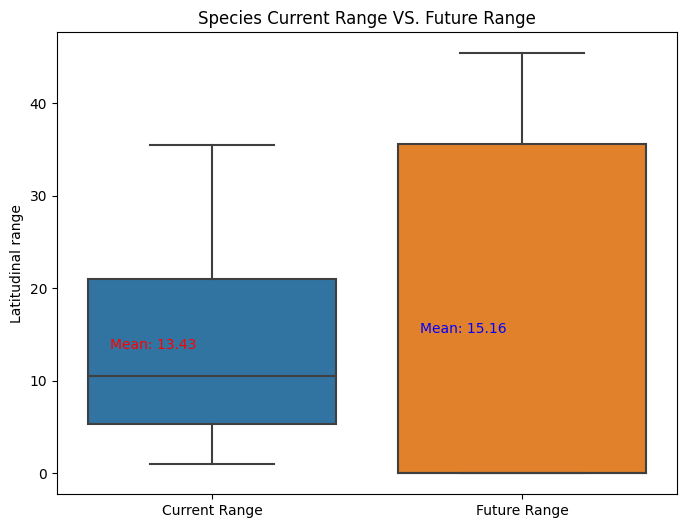

In [5]:
# Plotting the results

# Create a boxplot using Seaborn
sns.boxplot(data=merged_species[['Current Range', 'Future Range']])

# Calculate mean values for current and future range
mean_current = merged_species['Current Range'].mean()
mean_future = merged_species['Future Range'].mean()

# Add mean values as text annotations
plt.text(-0.05, mean_current, f'Mean: {mean_current:.2f}', color='red', ha='right')
plt.text(0.95, mean_future, f'Mean: {mean_future:.2f}', color='blue', ha='right')


# Add labels and title
plt.ylabel('Latitudinal range')
plt.title('Species Current Range VS. Future Range')

# figure size
plt.gcf().set_size_inches(8, 6)


# Save the plot as a PDF file (vector graphic)
plt.savefig('Range.pdf', format='pdf', dpi=300)

# Show the plot
plt.show()


C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arx33\anaconda3\envs\IDS\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


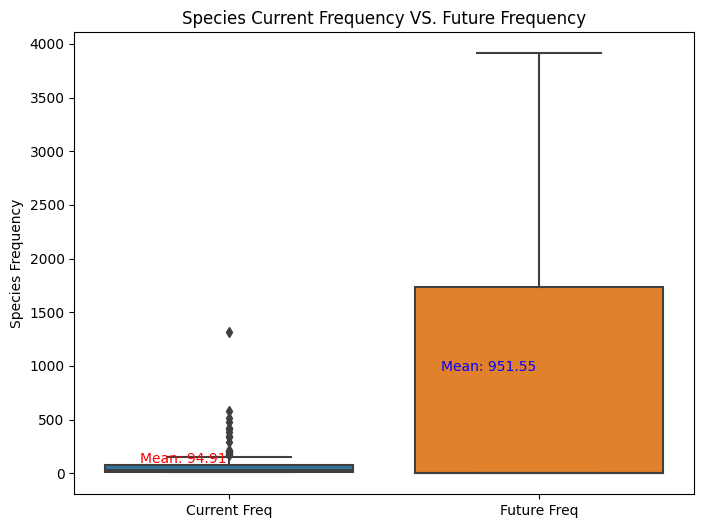

In [6]:
# boxplot for frequency
sns.boxplot(data=merged_species[['Current Freq', 'Future Freq']])

# Calculate mean values for current and future frequencies
mean_current = merged_species['Current Freq'].mean()
mean_future = merged_species['Future Freq'].mean()

# Add mean values as text annotations
plt.text(-0.01, mean_current, f'Mean: {mean_current:.2f}', color='red', ha='right')
plt.text(0.99, mean_future, f'Mean: {mean_future:.2f}', color='blue', ha='right')

# Add labels and title
plt.ylabel('Species Frequency')
plt.title('Species Current Frequency VS. Future Frequency')

# figure size
plt.gcf().set_size_inches(8, 6)

# Save the plot as a PDF file (vector graphic)
plt.savefig('Freq.pdf', format='pdf', dpi=300)

# Show the plot
plt.show()

In [7]:
# reading current and future bioclimatic variables for statistics
df = pd.read_csv('Bioclim_variables_final.csv')
df

,Cell_id,Cell_lat,FUT_BIO1,FUT_BIO2,FUT_BIO3,FUT_BIO4,FUT_BIO5,FUT_BIO6,FUT_BIO7,FUT_BIO8,...,BIO18MEAN,BIO19MEAN,BIO2MEAN,BIO3MEAN,BIO4MEAN,BIO5MEAN,BIO6MEAN,BIO7MEAN,BIO8MEAN,BIO9MEAN
0,Cell_00001,45.180500,15.30830,9.95741,32.082401,804.299011,32.546299,1.502780,31.043501,14.162000,...,168.729004,159.382004,9.43227,31.076300,777.994995,28.203301,-2.14978,30.353100,12.820400,6.491620
1,Cell_00004,53.644901,11.56670,7.18333,34.679199,498.958008,23.662500,2.883330,20.779200,6.318750,...,162.024994,164.214996,6.94350,35.401100,470.592987,20.632799,1.01840,19.614401,4.995850,5.813990
2,Cell_00007,47.680500,8.31759,8.41204,32.494400,660.880981,23.150000,-2.740740,25.890699,16.117600,...,486.819000,250.082993,8.37158,32.380501,662.682007,18.716400,-7.08742,25.803801,13.211500,-2.640490
3,Cell_00010,37.274300,19.04060,8.71884,35.176800,592.041016,32.994202,8.204351,24.789900,15.842000,...,41.850601,138.195007,8.42159,36.389500,551.781982,29.628901,6.48115,23.147699,14.838400,23.342501
4,Cell_00013,63.680500,5.61759,7.50556,22.169399,906.932007,23.943500,-9.901850,33.845402,18.831499,...,221.194000,116.200996,8.34536,23.179701,967.161987,20.756399,-15.24580,36.002300,13.984400,-5.179370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Cell_06912,64.453003,8.60000,3.96667,22.366699,521.000000,18.333300,0.533333,17.799999,9.566670,...,260.000000,391.000000,4.30064,23.353500,532.698975,15.423101,-2.99231,18.415400,6.152560,7.378210
3909,Cell_06913,59.477200,9.23333,6.60000,24.446699,750.773010,24.906700,-2.126670,27.033300,12.300000,...,205.000000,141.925995,6.93840,23.707199,798.004028,21.384300,-7.87468,29.259001,12.111100,1.754660
3910,Cell_06914,49.180500,11.70830,8.92870,33.935200,646.393982,27.400900,1.029630,26.371300,6.633330,...,211.242996,230.806000,8.57706,34.449200,618.515991,22.983900,-1.90483,24.888700,6.135030,6.137440
3911,Cell_06916,63.810600,6.48750,4.39167,28.174999,428.339996,15.164600,-0.422917,15.587500,6.108330,...,280.333008,345.614014,4.81083,29.818800,428.692993,13.232500,-2.90076,16.133301,1.316980,7.096130


In [12]:
# descriptive statistics for current mean temperature
print()
print("Descriptive statistics for current mean temperature:")
print(df["BIO1MEAN"].describe())

# descriptive statistics for current annual precipitation
print()
print("Descriptive statistics for current annual precipitation:")
print(df["BIO12MEAN"].describe())

# descriptive statistics for future mean temperature
print()
print("Descriptive statistics for future mean temperature:")
print(df["FUT_BIO1"].describe())

# descriptive statistics for future annual precipitation
print()
print("Descriptive statistics for future annual precipitation:")
print(df["FUT_BIO12"].describe())


Descriptive statistics for current mean temperature:
count    3913.000000
mean        6.788148
std         5.547380
min       -12.748500
25%         3.584700
50%         7.654520
75%        10.108500
max        18.831600
Name: BIO1MEAN, dtype: float64

Descriptive statistics for current annual precipitation:
count    3913.000000
mean      756.882925
std       336.772709
min         0.000000
25%       566.166992
50%       645.541992
75%       837.111023
max      3391.050049
Name: BIO12MEAN, dtype: float64

Descriptive statistics for future mean temperature:
count    3913.000000
mean       10.022412
std         4.800531
min        -4.006480
25%         6.960000
50%        10.638900
75%        12.966700
max        21.166700
Name: FUT_BIO1, dtype: float64

Descriptive statistics for future annual precipitation:
count    3913.000000
mean      768.403183
std       341.424970
min       217.447006
25%       578.283020
50%       666.328979
75%       832.099976
max      3513.040039
Name: FUT_BI